* [1. AR model](#chapter1)
* [2. MA model](#chapter2)
* [3. ARMA model](#chapter3)
* [4. ARIMA model](#chapter4)
* [5. ARIMAX model](#chapter5)
* [6. SARIMA model](#chapter6)
* [7. SARIMAX model](#chapter7)
* [8. Auto ARIMA model](#chapter8)
* [9. Predictions](#chapter9)


# Import relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.distributions import chi2
import yfinance as yfin
import datetime as dt
from pandas_datareader import data as pdr
import statsmodels.graphics.tsaplots as sgt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

# Importing data

In [2]:
start = dt.date(2017,12,31)
end = dt.date(2022,12,31)

tickers = ["MSFT", "^GSPC"]


yfin.pdr_override()
df = pd.DataFrame(pdr.get_data_yahoo(tickers, start, end)["Adj Close"])

[*********************100%***********************]  2 of 2 completed


In [3]:
df.index = pd.DatetimeIndex(df.index).to_period('b')

In [4]:
df

,MSFT,^GSPC
Date,,
2018-01-02,80.229004,2695.810059
2018-01-03,80.602386,2713.060059
2018-01-04,81.311790,2723.989990
2018-01-05,82.319916,2743.149902
2018-01-08,82.403908,2747.709961
...,...,...
2022-12-23,236.631790,3844.820068
2022-12-27,234.877350,3829.250000
2022-12-28,232.468735,3783.219971


# 1. AR model <a id="chapter1"></a>

In [5]:
model_ar_1 = ARIMA(df["MSFT"], order =(1,0,0))

results_ar_1 =model_ar_1.fit()

results_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   MSFT   No. Observations:                 1259
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -3478.785
Date:                Tue, 30 Jan 2024   AIC                           6963.570
Time:                        16:01:51   BIC                           6978.985
Sample:                    01-02-2018   HQIC                          6969.363
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        188.1884     49.114      3.832      0.000      91.927     284.450
ar.L1          0.9988      0.001    772.071      0.000       0.996       1.001
sigma2        14.6384      0.339     43.139      0.000      13.973      15.303
===================================================================================
Ljung-Box (L1) (Q):                  19.81   Jarque-Bera (JB):               852.97
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               9.20   Skew:                            -0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'Residuals of the AR(1) model')

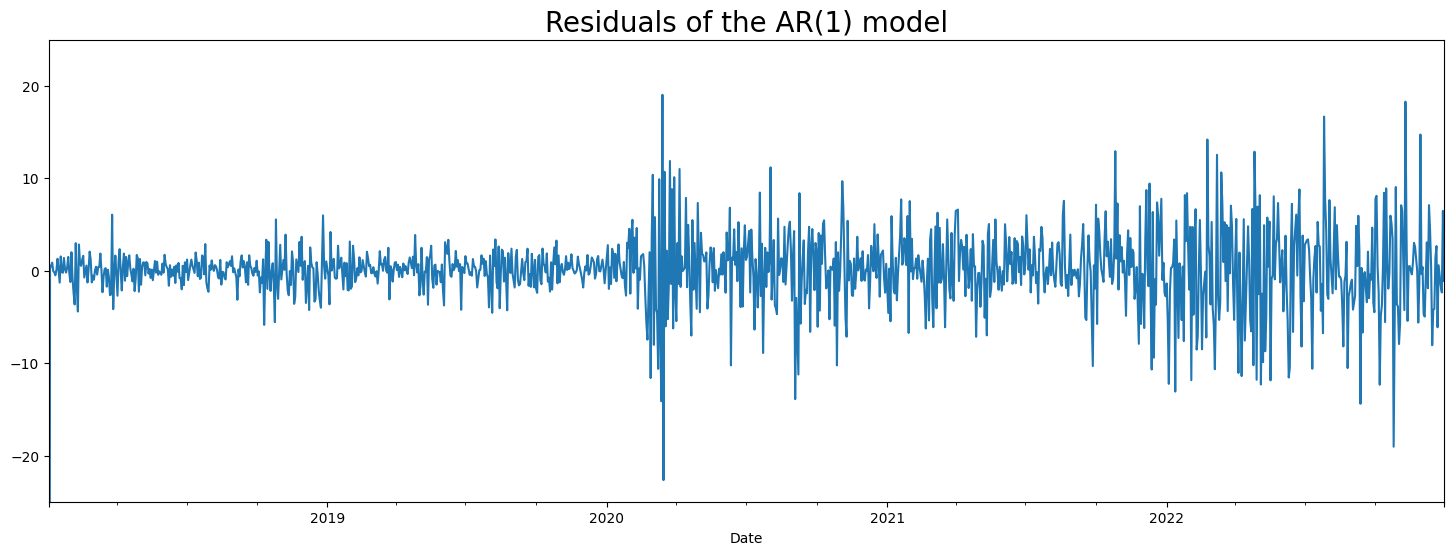

In [6]:
results_ar_1.resid.plot(figsize = (18,6))
plt.ylim(-25, 25)
plt.title("Residuals of the AR(1) model", size = 20)

# 2. MA model <a id="chapter2"></a>

In [7]:
model_ma_1 = ARIMA(df["MSFT"], order =(0,0,1))

results_ma_1 =model_ma_1.fit()

results_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   MSFT   No. Observations:                 1259
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -6388.354
Date:                Tue, 30 Jan 2024   AIC                          12782.708
Time:                        16:01:52   BIC                          12798.123
Sample:                    01-02-2018   HQIC                         12788.501
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        188.4337      2.220     84.873      0.000     184.082     192.785
ma.L1          0.9734      0.006    162.607      0.000       0.962       0.985
sigma2      1492.3043     98.894     15.090      0.000    1298.475    1686.133
===================================================================================
Ljung-Box (L1) (Q):                1084.61   Jarque-Bera (JB):                81.21
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.17   Skew:                             0.23
Prob(H) (two-sided):                  0.11   Kurtosis:                         1.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0.5, 1.0, 'Residuals of the MA(1) model')

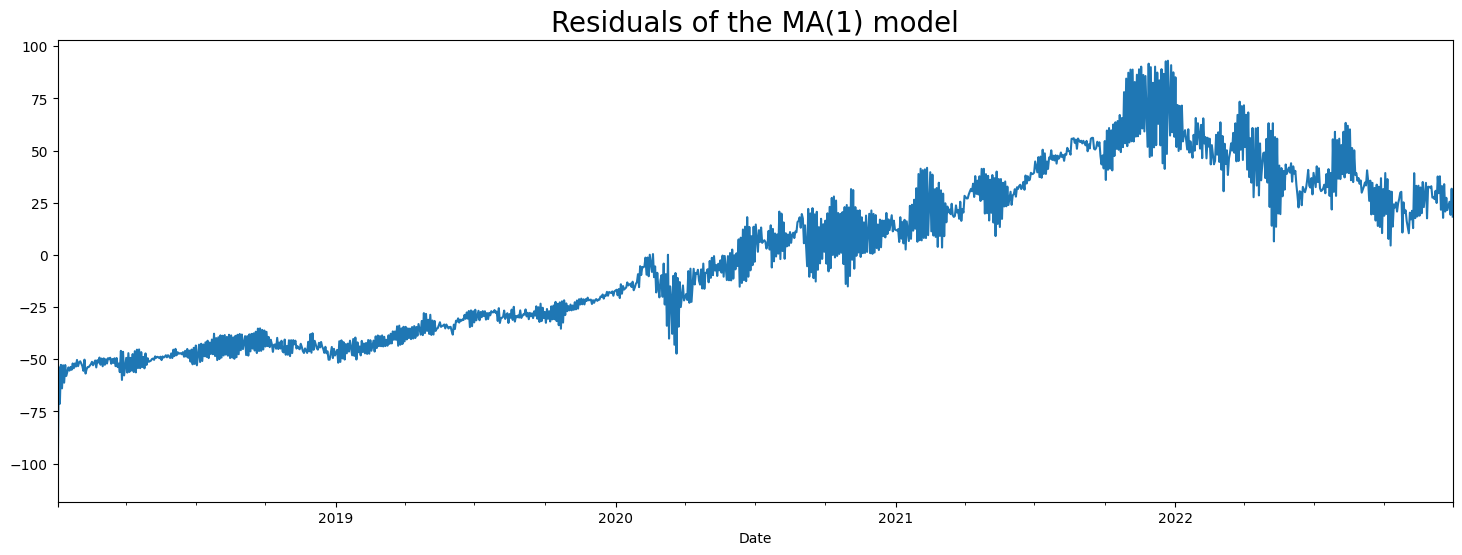

In [8]:
results_ma_1.resid.plot(figsize = (18,6))

plt.title("Residuals of the MA(1) model", size = 20)

Text(0.5, 1.0, 'ACF of the MA(1) model residuals')

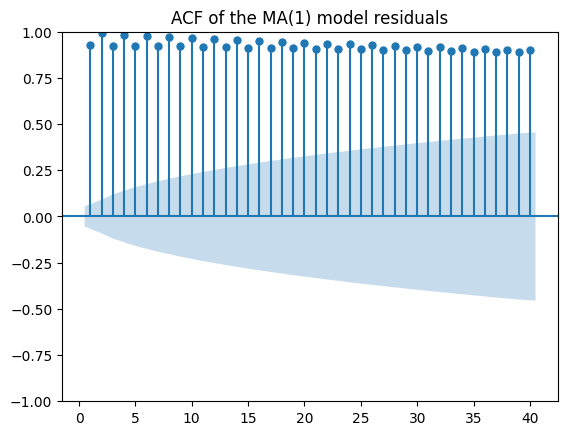

In [9]:
sgt.plot_acf(results_ma_1.resid, zero = False, lags = 40)
plt.title("ACF of the MA(1) model residuals")

# 3. ARMA model <a id="chapter3"></a>

In [10]:
model_ma_1_ar_1 = ARIMA(df["MSFT"], order =(1,0,1))

results_ma_1_ar_1 =model_ma_1_ar_1.fit()

results_ma_1_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   MSFT   No. Observations:                 1259
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -3469.067
Date:                Tue, 30 Jan 2024   AIC                           6946.134
Time:                        16:01:53   BIC                           6966.686
Sample:                    01-02-2018   HQIC                          6953.857
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        188.0585     52.810      3.561      0.000      84.554     291.563
ar.L1          0.9991      0.001    905.969      0.000       0.997       1.001
ma.L1         -0.1247      0.019     -6.674      0.000      -0.161      -0.088
sigma2        14.4127      0.364     39.625      0.000      13.700      15.126
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               664.73
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               9.51   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 4. ARIMA model <a id="chapter4"></a>

In [11]:
model_ma_1_i_1_ar_1 = ARIMA(df["MSFT"], order =(1,1,1))

results_ma_1_i_1_ar_1 =model_ma_1_i_1_ar_1.fit()

results_ma_1_i_1_ar_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   MSFT   No. Observations:                 1259
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3463.520
Date:                Tue, 30 Jan 2024   AIC                           6933.040
Time:                        16:01:53   BIC                           6948.452
Sample:                    01-02-2018   HQIC                          6938.832
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0144      0.147     -0.098      0.922      -0.302       0.273
ma.L1         -0.1110      0.149     -0.747      0.455      -0.402       0.180
sigma2        14.4184      0.360     40.009      0.000      13.712      15.125
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               677.61
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               9.66   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 5. ARIMAX model <a id="chapter5"></a>

The ARIMAX model has exactly the same structure of the ARIMA model, butwith a vector of exogenous variables X. Therefore an ARIMAX (1,1,1) wold have the form: $$\Delta Y_{t} = c + \theta_{}1 \Delta Y_{t-1} + \varphi_{1} \epsilon_{t-1} + \beta X  + \epsilon_{t} $$

In [12]:
model_ar_1_i_1_ma_1_Xspx = ARIMA(df["MSFT"], exog = df["^GSPC"], order = (1,1,1))

results_model_ra_1_i_1_ma_1_Xspx = model_ar_1_i_1_ma_1_Xspx.fit()

results_model_ra_1_i_1_ma_1_Xspx.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   MSFT   No. Observations:                 1259
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2730.903
Date:                Tue, 30 Jan 2024   AIC                           5469.806
Time:                        16:01:53   BIC                           5490.355
Sample:                    01-02-2018   HQIC                          5477.528
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
^GSPC          0.0710      0.001     65.673      0.000       0.069       0.073
ar.L1         -0.0210      0.774     -0.027      0.978      -1.538       1.496
ma.L1          0.0485      0.771      0.063      0.950      -1.462       1.559
sigma2         4.4979      0.083     54.360      0.000       4.336       4.660
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3091.47
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               7.26   Skew:                             0.05
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 6. SARIMA model <a id="chapter6"></a>

In [13]:
model_sarima = SARIMAX(df["MSFT"], order = (1,1,1), seasonal_order= (2,1,1,5))

results_sarima = model_sarima.fit()

results_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                              MSFT   No. Observations:                 1259
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 5)   Log Likelihood               -3460.674
Date:                           Tue, 30 Jan 2024   AIC                           6933.348
Time:                                   16:01:56   BIC                           6964.148
Sample:                               01-02-2018   HQIC                          6944.926
                                    - 12-30-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1269      0.155      0.817      0.414      -0.178       0.431
ma.L1         -0.2446      0.154     -1.593      0.111      -0.546       0.056
ar.S.L5        0.0227      0.020      1.112      0.266      -0.017       0.063
ar.S.L10      -0.0427      0.021     -2.066      0.039      -0.083      -0.002
ma.S.L5       -0.9999      0.715     -1.399      0.162      -2.401       0.401
sigma2        14.3491     10.167      1.411      0.158      -5.577      34.275
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               623.50
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               9.65   Skew:                            -0.34
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 7. SARIMAX model <a id="chapter7"></a>

In [14]:
model_sarimax = SARIMAX(df["MSFT"], exog = df["^GSPC"], order = (1,1,1), seasonal_order= (2,1,1,5))

results_sarimax = model_sarimax.fit()

results_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                              MSFT   No. Observations:                 1259
Model:             SARIMAX(1, 1, 1)x(2, 1, 1, 5)   Log Likelihood               -2734.994
Date:                           Tue, 30 Jan 2024   AIC                           5483.988
Time:                                   16:02:01   BIC                           5519.921
Sample:                               01-02-2018   HQIC                          5497.495
                                    - 12-30-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
^GSPC          0.0709      0.001     64.687      0.000       0.069       0.073
ar.L1          0.1493      0.700      0.213      0.831      -1.222       1.520
ma.L1         -0.1206      0.701     -0.172      0.863      -1.494       1.253
ar.S.L5       -0.0080      0.026     -0.310      0.757      -0.059       0.043
ar.S.L10      -0.0030      0.025     -0.120      0.905      -0.051       0.046
ma.S.L5       -0.9908      0.007   -147.135      0.000      -1.004      -0.978
sigma2         4.5342      0.093     48.865      0.000       4.352       4.716
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2782.35
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.27   Skew:                             0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 8. Auto ARIMA model <a id="chapter8"></a>

In [15]:
from pmdarima.arima import auto_arima

In [16]:
model_auto = auto_arima(df["MSFT"])

In [17]:
model_auto

ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [18]:
model_auto.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1259
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -3463.521
Date:                Tue, 30 Jan 2024   AIC                           6931.042
Time:                        16:02:04   BIC                           6941.317
Sample:                    01-02-2018   HQIC                          6934.903
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.1253      0.019     -6.729      0.000      -0.162      -0.089
sigma2        14.4183      0.360     40.010      0.000      13.712      15.125
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               678.18
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               9.66   Skew:                            -0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Auto ARIMA arguments: https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html#pmdarima.arima.auto_arima

In [19]:

# exogenous -> outside factors (e.g other time series)
# m -> seasonal cycle length
# max_order -> maximum amount of variables to be used in the regression (p + q)
# max_p -> maximum AR components
# max_q -> maximum MA components
# max_d -> maximum Integrations
# maxiter -> maximum iterations we're giving the model to converge the coefficients (becomes harder as the order increases)
# return_valid_fits -> whether or not the method should validate the results 
# alpha -> level of significance, default is 5%, which we should be using most of the time
# n_jobs -> how many models to fit at a time (-1 indicates "as many as possible")
# trend -> "ct" usually
# information_criterion -> 'aic', 'aicc', 'bic', 'hqic', 'oob' 
#        (Akaike Information Criterion, Corrected Akaike Information Criterion,
#        Bayesian Information Criterion, Hannan-Quinn Information Criterion, or
#        "out of bag"--for validation scoring--respectively)
# out_of_smaple_size -> validates the model selection (pass the entire dataset, and set 20% to be the out_of_sample_size)

Auto ARIMA arguments: https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html#pmdarima.arima.auto_arima

# 9. Predictions <a id="chapter9"></a>

In [30]:
df

,MSFT,^GSPC
Date,,
2018-01-02,80.229004,2695.810059
2018-01-03,80.602386,2713.060059
2018-01-04,81.311790,2723.989990
2018-01-05,82.319916,2743.149902
2018-01-08,82.403908,2747.709961
...,...,...
2022-12-23,236.631790,3844.820068
2022-12-27,234.877350,3829.250000
2022-12-28,232.468735,3783.219971


In [21]:
start_date = "2022-12-30"
end_date = "2023-01-30"

In [25]:
results_sarima.predict(start = start_date, end = end_date)

2022-10-28    238.207637
2022-10-31    238.167839
2022-11-01    238.339465
2022-11-02    238.246787
2022-11-03    238.877723
                 ...    
2023-01-24    245.982324
2023-01-25    246.001406
2023-01-26    246.586115
2023-01-27    246.302280
2023-01-30    246.575931
Freq: B, Name: predicted_mean, Length: 67, dtype: float64

<Axes: >

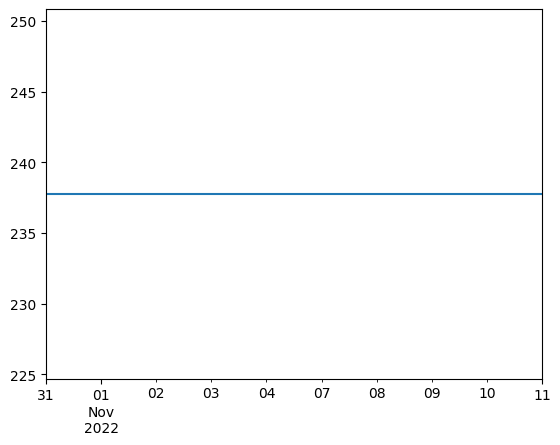

In [26]:
model_auto.predict(start = start_date, end = end_date).plot()

To predict with the auto ARIMA method:

In [27]:
model_auto = auto_arima(df["MSFT"])

In [28]:
#We transform the predictions to a DataFrame as they are given in a nparray
df_auto_pred = pd.DataFrame(model_auto.predict(n_periods= 10))

<Axes: >

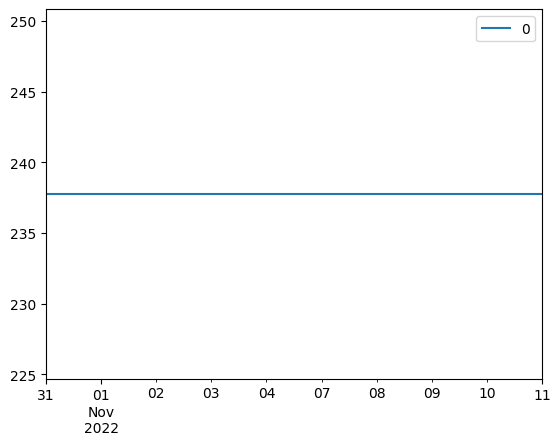

In [29]:
df_auto_pred.plot()